<a href="https://colab.research.google.com/github/SACHINSIROHI47/DataScience_with_Python_Programming_Project/blob/main/Web_Scraping_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping**
Web scraping, web harvesting, or web data extraction is data scraping used for extracting data from websites. Web scraping software may directly access the World Wide Web using the Hypertext Transfer Protocol or a web browser

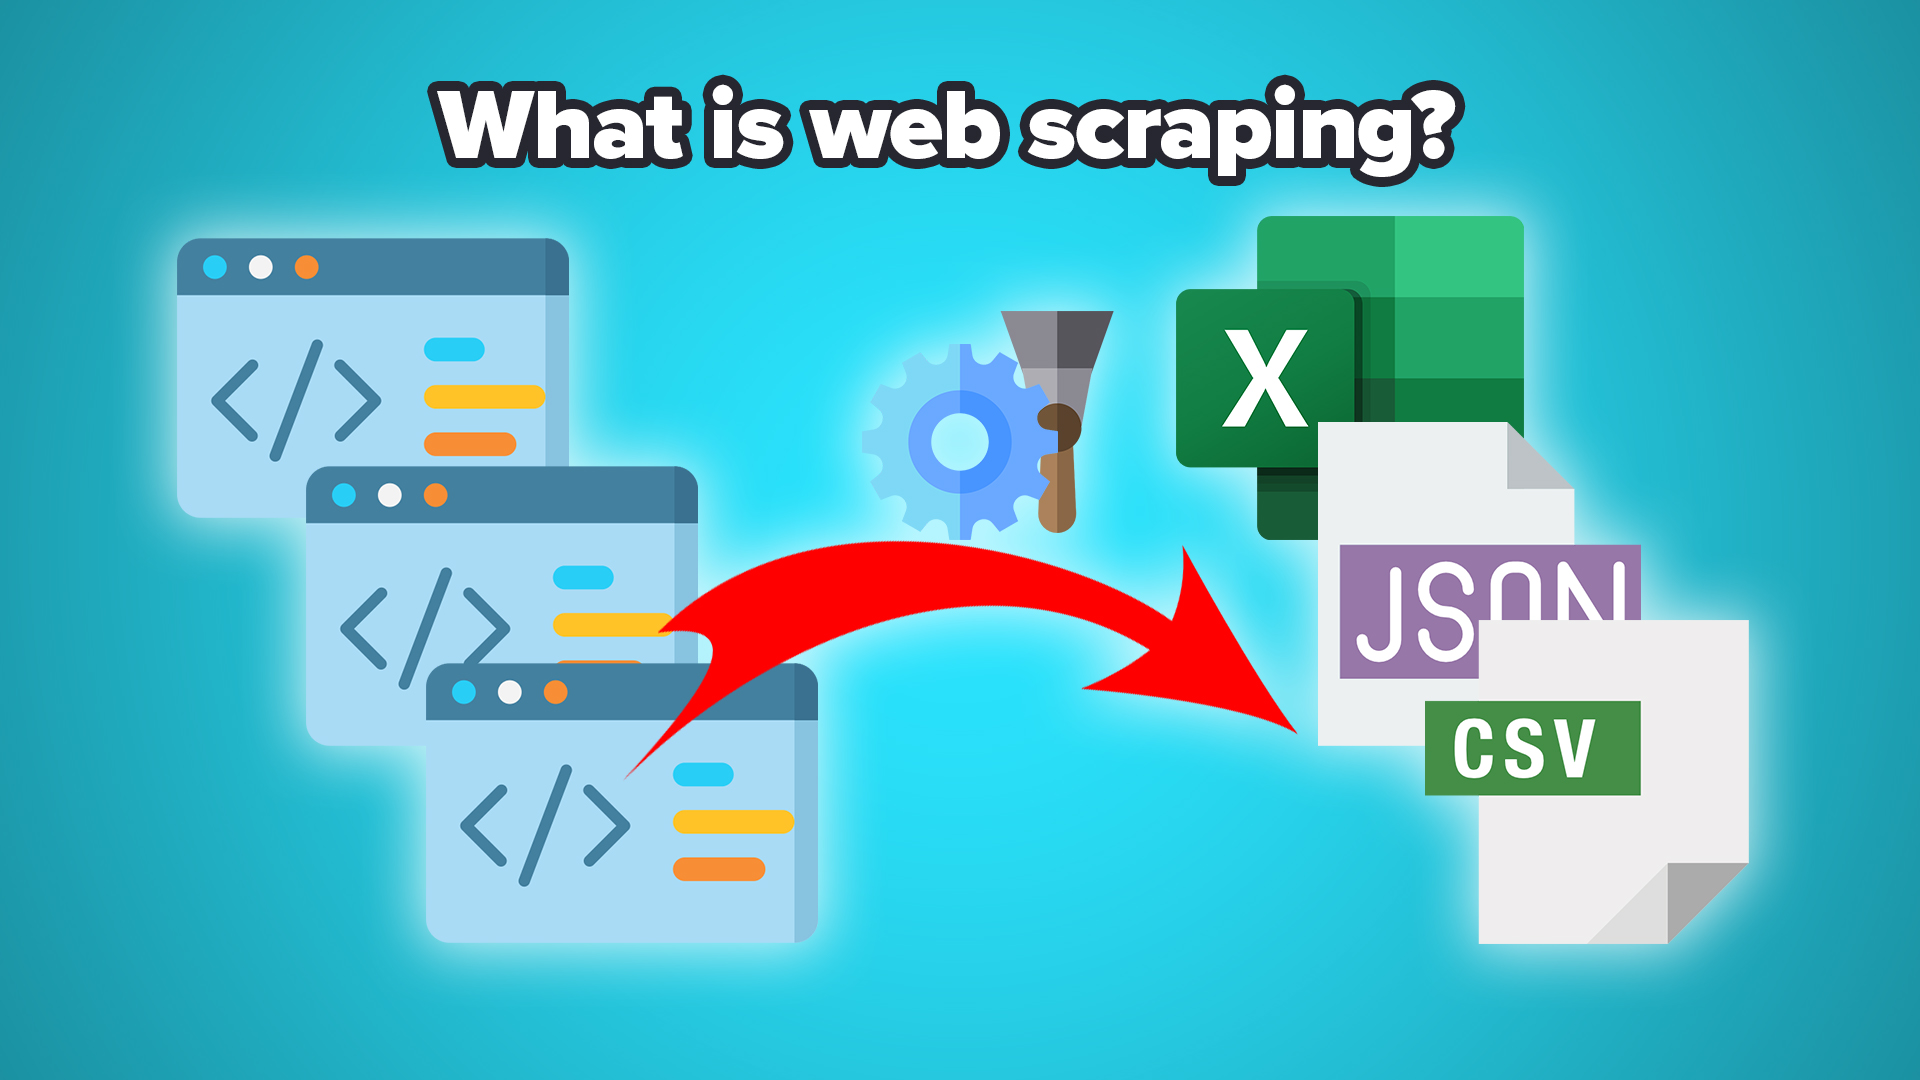

# **#Load Library**

In [1]:
#load library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

 **Fetch Data From Website**

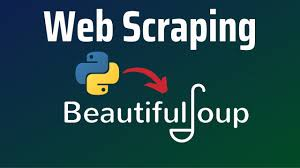

In [50]:
import requests
from bs4 import BeautifulStoneSoup
url='https://realpython.github.io/fake-jobs/'
response=requests.get(url)
soup=BeautifulStoneSoup(response.text)
# print(soup.prettify())



In [51]:
result=soup.find(id='ResultsContainer')
# print(result.prettify())

In [52]:
jobElement=result.find_all('div',class_='card-content')
# for job in jobElement:
#     print(job.text)

In [53]:
#fetch title h2 and h3
for jobs in jobElement:
    titleElement=jobs.find('h2',class_='title is-5')
    companyElement=jobs.find('h3',class_='subtitle is-6 company')
    locationElement=jobs.find('p',class_='location')
    # print(titleElement.text.strip())
    # print(companyElement.text.strip())
    # print(locationElement.text.strip())


In [23]:
#store into differenct list
title=[]
company=[]
location=[]
for jobs in jobElement:
    titleElement=jobs.find('h2',class_='title is-5')
    companyElement=jobs.find('h3',class_='subtitle is-6 company')
    locationElement=jobs.find('p',class_='location')
    title.append(titleElement.text.strip())
    company.append(companyElement.text.strip())
    location.append(locationElement.text.strip())
print(title)
print(company)
print(location)

['Senior Python Developer', 'Energy engineer', 'Legal executive', 'Fitness centre manager', 'Product manager', 'Medical technical officer', 'Physiological scientist', 'Textile designer', 'Television floor manager', 'Waste management officer', 'Software Engineer (Python)', 'Interpreter', 'Architect', 'Meteorologist', 'Audiological scientist', 'English as a second language teacher', 'Surgeon', 'Equities trader', 'Newspaper journalist', 'Materials engineer', 'Python Programmer (Entry-Level)', 'Product/process development scientist', 'Scientist, research (maths)', 'Ecologist', 'Materials engineer', 'Historic buildings inspector/conservation officer', 'Data scientist', 'Psychiatrist', 'Structural engineer', 'Immigration officer', 'Python Programmer (Entry-Level)', 'Neurosurgeon', 'Broadcast engineer', 'Make', 'Nurse, adult', 'Air broker', 'Editor, film/video', 'Production assistant, radio', 'Engineer, communications', 'Sales executive', 'Software Developer (Python)', 'Futures trader', 'Tour

In [25]:
#convert into dataframe title company and location
import pandas as pd
df=pd.DataFrame({'title':title,'company':company,'location':location})
df.head()


,title,company,location
0,Senior Python Developer,"Payne, Roberts and Davis","Stewartbury, AA"
1,Energy engineer,Vasquez-Davidson,"Christopherville, AA"
2,Legal executive,"Jackson, Chambers and Levy","Port Ericaburgh, AA"
3,Fitness centre manager,Savage-Bradley,"East Seanview, AP"
4,Product manager,Ramirez Inc,"North Jamieview, AP"


In [30]:
#group by
df.groupby('title').count()
df.groupby('company').count()
df.groupby('location').count()

,title,company
location,,
"Adamburgh, AA",1,1
"Alberttown, AE",1,1
"Amyborough, AA",1,1
"Angelastad, AP",1,1
"Arnoldhaven, AE",1,1
...,...,...
"Williambury, AA",1,1
"Williamsburgh, AE",1,1
"Wilsonmouth, AA",1,1


<Axes: ylabel='title'>

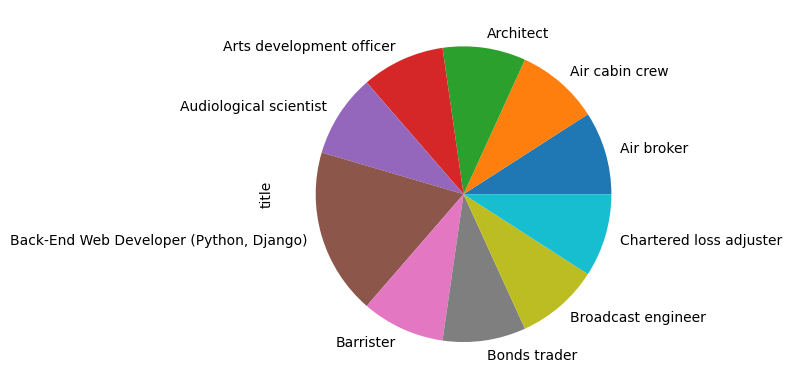

In [44]:
#visualise the groupby title show only 10 record
df.groupby(['title'])['title'].count().head(10).plot(kind='pie')

<Axes: ylabel='company'>

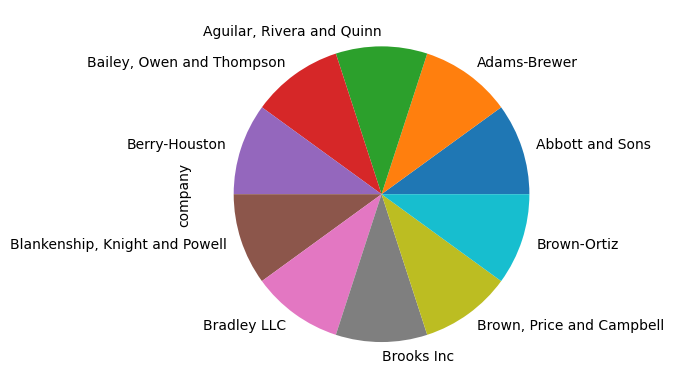

In [45]:
#visualise the groupby title show only 10 record
df.groupby(['company'])['company'].count().head(10).plot(kind='pie')

<Axes: ylabel='location'>

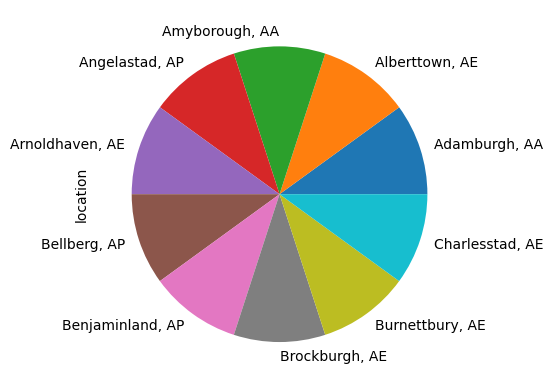

In [46]:
#visualise the groupby location show only 10 record
df.groupby(['location'])['location'].count().head(10).plot(kind='pie')

In [48]:
#export the title compnay and location dataframe into csv file
df.to_csv('job.csv')


In [49]:
data=pd.read_csv('job.csv')
data.head()

,Unnamed: 0,title,company,location
0,0,Senior Python Developer,"Payne, Roberts and Davis","Stewartbury, AA"
1,1,Energy engineer,Vasquez-Davidson,"Christopherville, AA"
2,2,Legal executive,"Jackson, Chambers and Levy","Port Ericaburgh, AA"
3,3,Fitness centre manager,Savage-Bradley,"East Seanview, AP"
4,4,Product manager,Ramirez Inc,"North Jamieview, AP"


**More Example for Webscraping Website**
https://www.realtor.com/realestateagents/lehigh-acres_fl/pg-3